In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('florida_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_10_max', 'Booster_Doses_50Plus', 'new_cases_10_mean', 'minimum_temperature_celsius', 'new_cases_7_lag', 'new_cases_350_lag', 'new_cases_10_std', 'maximum_temperature_celsius', 'new_hospitalized_patients', 'Series_Complete_5Plus']]
covid_test = covid_test[['y', 'new_cases_10_max', 'Booster_Doses_50Plus', 'new_cases_10_mean', 'minimum_temperature_celsius', 'new_cases_7_lag', 'new_cases_350_lag', 'new_cases_10_std', 'maximum_temperature_celsius', 'new_hospitalized_patients', 'Series_Complete_5Plus']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:20117.79476	validation_1-rmse:64606.22345
[1]	validation_0-rmse:19963.83408	validation_1-rmse:64322.20766
[2]	validation_0-rmse:19811.40809	validation_1-rmse:64041.22756
[3]	validation_0-rmse:19660.50797	validation_1-rmse:63763.25655
[4]	validation_0-rmse:19511.11982	validation_1-rmse:63488.24962
[5]	validation_0-rmse:19363.21894	validation_1-rmse:63216.27804
[6]	validation_0-rmse:19216.81130	validation_1-rmse:62947.15209
[7]	validation_0-rmse:19071.87754	validation_1-rmse:62680.92576
[8]	validation_0-rmse:18928.34116	validation_1-rmse:62418.35682
[9]	validation_0-rmse:18786.22682	validation_1-rmse:62158.54886
[10]	validation_0-rmse:18645.56115	validation_1-rmse:61891.13330
[11]	validation_0-rmse:18506.18543	validation_1-rmse:61636.79649
[12]	validation_0-rmse:18368.16390	validation_1-rmse:61375.61176
[13]	validation_0-rmse:18231.45785	validation_1-rmse:61117.28290
[14]	validation_0-rmse:18096.09535	validation_1-rmse:60871.04677
[15]	validation_0-rmse:17962.00540	

[127]	validation_0-rmse:8626.72949	validation_1-rmse:40241.14065
[128]	validation_0-rmse:8575.31762	validation_1-rmse:40103.53633
[129]	validation_0-rmse:8524.40170	validation_1-rmse:39966.95861
[130]	validation_0-rmse:8473.84037	validation_1-rmse:39829.41665
[131]	validation_0-rmse:8423.72409	validation_1-rmse:39694.66503
[132]	validation_0-rmse:8373.77248	validation_1-rmse:39560.70499
[133]	validation_0-rmse:8324.23307	validation_1-rmse:39427.61774
[134]	validation_0-rmse:8275.04627	validation_1-rmse:39295.43799
[135]	validation_0-rmse:8226.35457	validation_1-rmse:39164.23186
[136]	validation_0-rmse:8177.90276	validation_1-rmse:39032.63799
[137]	validation_0-rmse:8129.76367	validation_1-rmse:38903.05789
[138]	validation_0-rmse:8082.01561	validation_1-rmse:38774.37222
[139]	validation_0-rmse:8034.58450	validation_1-rmse:38646.51372
[140]	validation_0-rmse:7987.54593	validation_1-rmse:38518.36917
[141]	validation_0-rmse:7940.79444	validation_1-rmse:38392.21619
[142]	validation_0-rmse:7

[254]	validation_0-rmse:4271.18091	validation_1-rmse:29163.60402
[255]	validation_0-rmse:4249.00257	validation_1-rmse:29161.40725
[256]	validation_0-rmse:4227.10314	validation_1-rmse:29160.53928
[257]	validation_0-rmse:4205.30161	validation_1-rmse:29161.59600
[258]	validation_0-rmse:4183.70149	validation_1-rmse:29164.27807
[259]	validation_0-rmse:4162.21242	validation_1-rmse:29168.70176
[260]	validation_0-rmse:4140.75641	validation_1-rmse:29174.34196
[261]	validation_0-rmse:4119.63162	validation_1-rmse:29181.78495
[262]	validation_0-rmse:4098.61397	validation_1-rmse:29191.04810
[263]	validation_0-rmse:4077.86398	validation_1-rmse:29201.98120
[264]	validation_0-rmse:4057.26157	validation_1-rmse:29214.22006
[265]	validation_0-rmse:4036.74509	validation_1-rmse:29227.81118
[266]	validation_0-rmse:4016.44781	validation_1-rmse:29243.26082


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

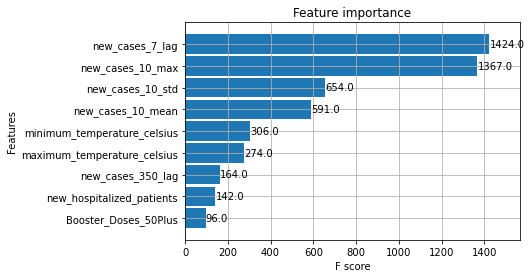

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

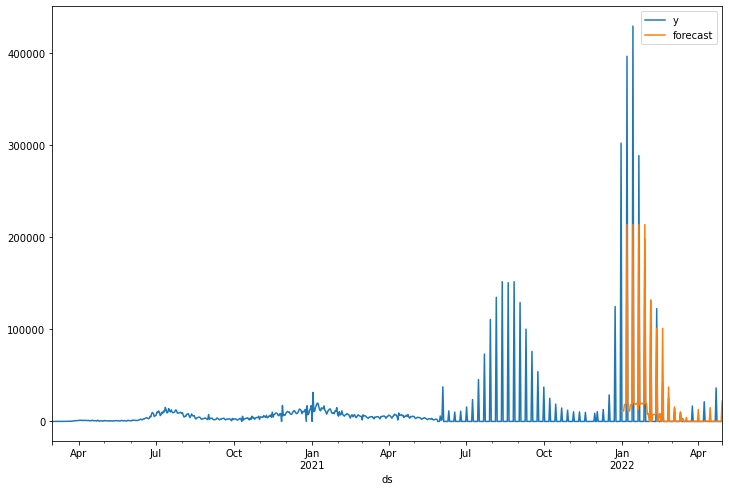

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

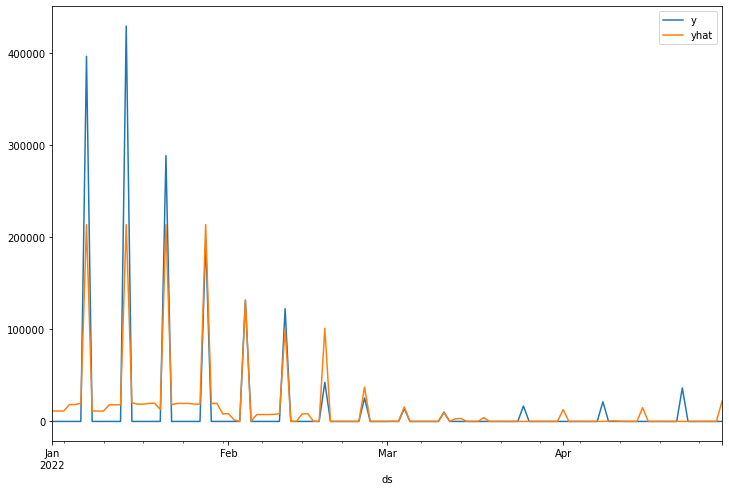

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  29160.539287111373
Test MAE:  10396.495491301312
MASE =  0.35399004037791904


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

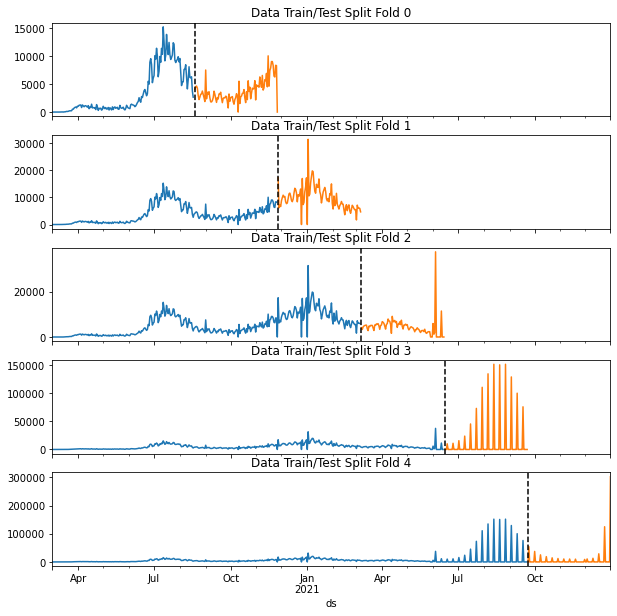

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:46:57] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20120.64638	validation_1-rmse:64606.16013
[100]	validation_0-rmse:10358.16965	validation_1-rmse:44264.92439
[200]	validation_0-rmse:6138.27511	validation_1-rmse:31985.62367
[287]	validation_0-rmse:4307.71993	validation_1-rmse:28642.71829
[19:46:57] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:20120.64638	validation_1-rmse:64606.16013
[100]	validation_0-rmse:10358.16965	validation_1-rmse:44264.92439
[200]	validation_0-rmse:6138.27511	validation_1-rmse:31985.62367
[286]	validation_0-rmse:4322.36788	validation_1-rmse:28616.42013
[19:46:58] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is 

<AxesSubplot:xlabel='ds'>

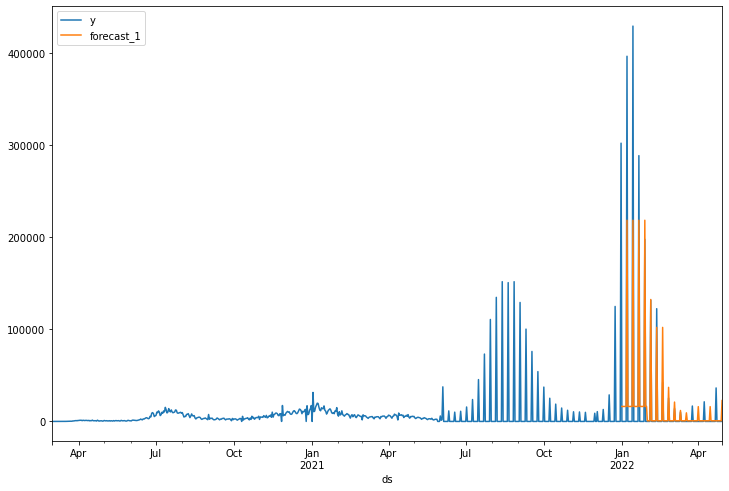

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

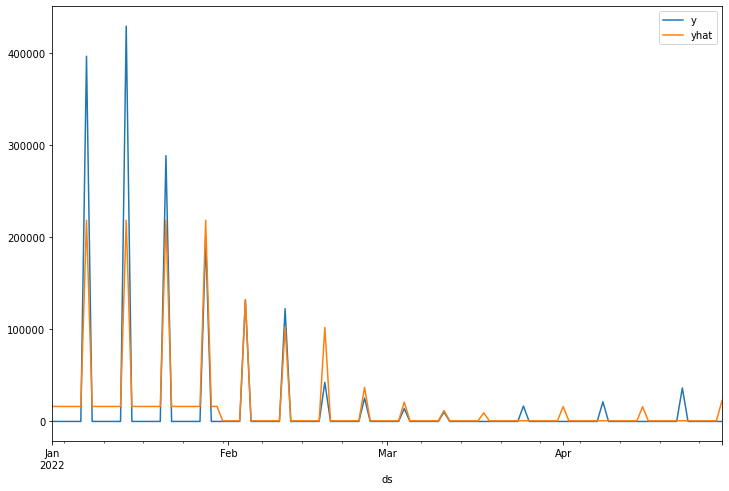

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  29160.539287111373
Test MAE:  10396.495491301312
MASE =  0.35399004037791904
